# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

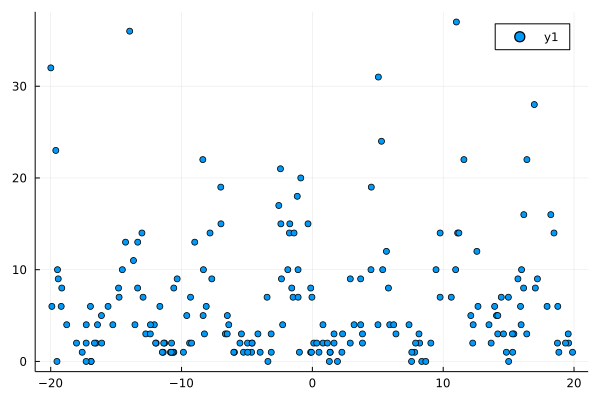

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:03
  iter:  20
  ELBO:  -594.9912931295997
[ Info: Training ended after 20 iterations. Total number of iterations 20
  4.035156 seconds (6.81 M allocations: 414.471 MiB, 5.35% gc time, 98.38% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.42471313135161953, 0.5858620458460424, 0.24513846566831576, 0.36109093952159316, 0.3648212164681241, 0.35292735650420576, 0.6213259032682595, 0.5248867653878491, 0.4192501940845455, 0.44484151793556403  …  0.38568215535173456, 0.4624348931808004, 0.25898195125304896, 0.6369283609282115, 0.43558155198109766, 0.4546864274523449, 0.20684233633124527, 0.3349562379514115, 0.19371084107815859, 0.5575367037733102], θ = [9.85234514260259, 5.347902640875111, 5.4726219466089425, 8.408831311709667, 10.385071685886691, 3.464117542819863, 2.9070742491557593, 3.910626127560037, 5.420829708924125, 2.4595739503545415  …  12.34732202264008, 2.947657531033039, 3.9777917256531024, 3.870043595000141, 13.782767481741377, 5.407163118529715, 3.985799501269113, 13.375180097078202, 5.482865841595567, 2.9246301912062425]), opt_state = (NamedTuple(),), hyperopt_state = (Na

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -790.5524691685489
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.624704 seconds (4.34 M allocations: 303.051 MiB, 3.03% gc time, 94.34% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.448015146413077) infered by Analytic Variational Inference , (local_vars = (c = [0.3321885662800997, 0.5532505389650026, 0.37475615852904565, 0.25569823092789296, 0.2514789364092577, 0.5758813295722771, 0.8229127788989385, 0.7486800168388437, 0.6525046793144414, 0.6666019648908086  …  0.2752301500966255, 0.6897375252175474, 0.47065196526871894, 0.8379608163146629, 0.34558812012654855, 0.37734508432748964, 0.30892031879108556, 0.22723820799133546, 0.26241002650086337, 0.7509433699568284], θ = [10.461569669095784, 5.529891871679212, 7.062425880953355, 9.177147178685477, 11.156437366275359, 5.432229018904062, 5.191733562476897, 6.05991740632384, 7.444742795209855, 4.563957681086247  …  13.092668953798412, 5.05224590166862, 5.783250604102073, 6.141400155778821, 14.390242908563026, 5.958707432778731, 5.5050445355947755, 14.224350838895967, 6.91323844852464, 5.11281031938086], γ = [6.115190787305164, 5.340458910499337, 8.2897765

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

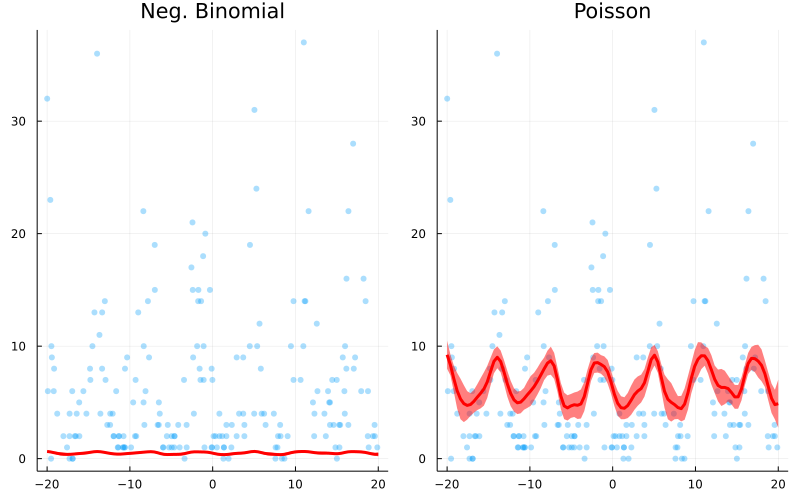

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*